In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import category_encoders as ce

import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

### Loading Data 

In [16]:
US_data = pd.read_csv('../input/youtube-new/USvideos.csv')
US_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [17]:
def category(path):
    with open(path) as json_file:  
        data = json.load(json_file)
    category_info_list=[]
    for row in data['items']:
        id_info=row['id']
        category_name=row['snippet']['title']
        categoty_info=(id_info ,category_name)
        category_info_list.append(categoty_info)
    return(dict(category_info_list))

In [18]:
US_category_names = category('../input/youtube-new/US_category_id.json')

In [19]:
#US labels
names=[]
for i in US_data.category_id:
    category_name=US_category_names.get(str(i))
    names.append(category_name)

US_data['category_names']=names

US_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_names
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [20]:
US_data['category_names'].value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_names, dtype: int64

### Column Selection

In [21]:
def preProcessing(X):
    X = X.copy()             
    #Deduplicate
    X = X.drop_duplicates(['video_id'], keep='first')
    
    #Remove error videos
    X = X[X.video_error_or_removed == False]
    
    #Remove videos which don't have categories
    X = X[X['category_names'].isna() == False]
    
    #Remove unuseful features
    X = X.drop(columns=['video_id','trending_date','category_id','publish_time','views','likes','dislikes',
                        'comment_count','thumbnail_link','video_error_or_removed','comments_disabled','ratings_disabled'])
    
    #Strings cleaning
    X["clean_title"] = X["title"].str.lower()
    X["clean_title"] = X["clean_title"].str.replace(r'[^\w\s]+', '')

    X["clean_channel"] = X["channel_title"].str.lower()
    X["clean_channel"] = X["clean_channel"].str.replace(r'[^\w\s]+', '')
    
    X["clean_description"] = X["description"].str.lower()
    X["clean_description"] = X["clean_description"].str.replace(r'[^\w\s]+', '')

    X["clean_tags"] = X["tags"].str.lower()
    X["clean_tags"] = X["clean_tags"].str.replace(r'[^\w\s]+', '')
    X['clean_tags'] = X['clean_tags'].str.replace("|"," ")
    X['clean_tags'] = X['clean_tags'].str.replace('\"',' ')
    
    X = X.drop(columns=["tags","description","title","channel_title"])
    X = X.rename(columns={'clean_title':'title', 'clean_description':'description',
                          'clean_tags':'tags', 'clean_channel':'channel_title'})
    
    #NA values
    X['description'] = X["description"].fillna("MISSING")
    X['tags'] = X["tags"].fillna("MISSING")
    X['title'] = X["title"].fillna("MISSING")
    X['channel_title'] = X["channel_title"].fillna("MISSING")
    
    #reset index 
    X = X.reset_index(drop=True)
    
    return X

In [22]:
data=preProcessing(US_data)
data.head()

,category_names,title,channel_title,description,tags
0,People & Blogs,we want to talk about our marriage,caseyneistat,shantells channel httpswwwyoutubecomshantellm...,shantell martin
1,Entertainment,the trump presidency last week tonight with jo...,lastweektonight,one year after the presidential election john ...,last week tonight trump presidencylast week to...
2,Comedy,racist superman rudy mancuso king bach lele ...,rudy mancuso,watch my previous video nnsubscribe httpswww...,racist supermanrudymancusokingbachracistsuperm...
3,Entertainment,nickelback lyrics real or fake,good mythical morning,today we find out if link is a nickelback amat...,rhett and linkgmmgood mythical morningrhett an...
4,Entertainment,i dare you going bald,nigahiga,i know its been a while since we did this show...,ryanhigahigatvnigahigai dare youidyrhpcdaresno...


In [23]:
data['category_names'].value_counts()

Entertainment            1617
Music                     799
Howto & Style             595
Comedy                    547
News & Politics           505
People & Blogs            498
Sports                    451
Science & Technology      380
Film & Animation          317
Education                 250
Pets & Animals            138
Gaming                    103
Autos & Vehicles           70
Travel & Events            60
Nonprofits & Activism      14
Shows                       4
Name: category_names, dtype: int64

In [24]:
data['category_names'].value_counts(normalize=True)

Entertainment            0.254726
Music                    0.125866
Howto & Style            0.093730
Comedy                   0.086169
News & Politics          0.079553
People & Blogs           0.078450
Sports                   0.071046
Science & Technology     0.059861
Film & Animation         0.049937
Education                0.039382
Pets & Animals           0.021739
Gaming                   0.016226
Autos & Vehicles         0.011027
Travel & Events          0.009452
Nonprofits & Activism    0.002205
Shows                    0.000630
Name: category_names, dtype: float64

### Feature Extraction - Description

In [25]:
words = pd.DataFrame(pd.Series(' '.join(data['description']).split()).value_counts()[:200])
words.head()

,0
the,25513
and,15435
to,14570
on,12265
of,10281


In [26]:
# NLTK Stop words
words = words.reset_index()
words = words.rename(columns={"index":"word", "0":"count"})

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','follow', 'http', 'www', 'facebook',
                   'instagram','twitter', 'youtube','channel','subscribe','video','subscribers', 'like'])
tops = list(set(words.word)-set(stop_words))
#Add other potential meaningless words (top words in description) to stop words
stop_words.extend(tops)

In [27]:
vectorizer = CountVectorizer(stop_words = stop_words)

token_counts = vectorizer.fit_transform(data['description'])

print('Shape: {}'.format(token_counts.shape))

Shape: (6348, 81502)


In [28]:
n_topics = 16
lda = LatentDirichletAllocation(n_components=n_topics)
lda.fit(token_counts)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=16, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [29]:
#Top 10 words for each Category 
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [30]:
print("\nTopics in LDA model:")
tf_feature_names = vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names)


Topics in LDA model:
Topic #0: chappell warner studios pons stocking jibawi mancuso watching sarkis previous
Topic #1: nfollow christmas snl youll thank behind great scenes including fox
Topic #2: morning members million wwe trailer network hours leading including culture
Topic #3: warner react chappell fine director assistant coordinator brothers podcast sometimes
Topic #4: bon wwhl vogue fashion bravo peterson never bloom havent appétit
Topic #5: seth stephen colbert pm space access funny celebrities bits meyers
Topic #6: tom jennifer tweets channing mean tatum kimmels lie host idol
Topic #7: wars nail vanity fair camera phone cnbc lens art nails
Topic #8: cat simons fort challenge features league adam team coaches vox
Topic #9: corden musical guests sketches house march room behindthescenes host become
Topic #10: link mythical cw marvel gmm part spotify 100 riverdale send
Topic #11: cake bbc missing century 20th earth fox pop kuwtk chocolate
Topic #12: wired network patreon kevin b

In [31]:
col_names = ["Desc. Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda.transform(token_counts)
topic_df = pd.DataFrame(topic_dist, columns = col_names)

data_description_featured = pd.concat([data, topic_df], axis=1)

print(f'old: {data.shape}')
print(f'new: {data_description_featured.shape}\n')

old: (6348, 5)
new: (6348, 21)



### Feature Extraction - Title

In [32]:
words_title = pd.DataFrame(pd.Series(' '.join(data['title']).split()).value_counts()[:50])
words_title = words_title.reset_index()
words_title = words_title.rename(columns={"index":"word", "0":"count"})
stop_words_title = stopwords.words('english')
tops_title = list(set(words_title.word)-set(stop_words_title))
stop_words_title.extend(['2018','10','2017','7','la','2','1','6','4','5','3','video'])
vectorizer_title = CountVectorizer(stop_words = stop_words_title)

token_counts_title  = vectorizer_title.fit_transform(data['title'])

print('Shape: {}'.format(token_counts_title.shape))

Shape: (6348, 10672)


In [33]:
lda_title = LatentDirichletAllocation(n_components=n_topics)
lda_title.fit(token_counts_title)
print("\nTopics in LDA model:")
tf_feature_names = vectorizer_title.get_feature_names()
print_top_words(lda_title, tf_feature_names)


Topics in LDA model:
Topic #0: love official show school graham norton audio shooting chris ft
Topic #1: cake royal doctor line chocolate wedding christmas old ft trump
Topic #2: vs new honest trailers espn news james mean talk game
Topic #3: first live take time espn stephen smith look perfect youtube
Topic #4: trailer official hd netflix teaser season ft hot life kardashian
Topic #5: new official falcon heavy day lyric music see space audio
Topic #6: everything minutes wrong diy justice league james less fashion ronan
Topic #7: makeup ever beauty tutorial cat lip day every refinery29 best
Topic #8: things fox president weird top century stranger 20th march trump
Topic #9: super bowl official commercial black olympics winter make feat cooking
Topic #10: war questions infinity avengers ed official big sheeran marvel wired
Topic #11: official music audio show hannah ft train david react stocking
Topic #12: star wars last vs jedi week game get movie highlights
Topic #13: top night plays

In [34]:
col_names = ["Title Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_title.transform(token_counts_title)
topic_df = pd.DataFrame(topic_dist, columns = col_names)

data_title_featured = pd.concat([data_description_featured, topic_df], axis=1)

print(f'old: {data_description_featured.shape}')
print(f'new: {data_title_featured.shape}\n')

old: (6348, 21)
new: (6348, 37)



### Feature Extraction - Tags

In [35]:
words_tags = pd.DataFrame(pd.Series(' '.join(data['title']).split()).value_counts()[:100])
words_tags = words_tags.reset_index()
words_tags = words_tags.rename(columns={"index":"word", "0":"count"})
stop_words_tags = stopwords.words('english')
tops_tags = list(set(words_tags.word)-set(stop_words_tags))
stop_words_tags.extend(['2018','10','2017','7','la','2','1','6','4','5','3','video'])
vectorizer_tags = CountVectorizer(stop_words = stop_words_tags)

token_counts_tags  = vectorizer_tags.fit_transform(data['tags'])

print('Shape: {}'.format(token_counts_tags.shape))

Shape: (6348, 52268)


In [36]:
lda_tags = LatentDirichletAllocation(n_components=n_topics)
lda_tags.fit(token_counts_tags)
print("\nTopics in LDA model:")
tf_feature_names = vectorizer_tags.get_feature_names()
print_top_words(lda_tags, tf_feature_names)


Topics in LDA model:
Topic #0: none smith youtubeyoutube music smithwill life league dashboard vs new
Topic #1: norton graham vs night show happens perry make pro full
Topic #2: life noggin original netflixtrailernetflix seriesnetflix nogginlife onlinetelevision seriestelevisionmoviesstreamingmovies harris onlinedocumentarycomedydrama08282016ntflxuscanwatch
Topic #3: wars last perfect star jedi bottle seth meyershostpromosethmeyersweekend showcomedyhumorstandupparodysnl updatenews
Topic #4: latest newshappening clark nail alex professionsean feastfwffirstwefeastfoodfood beercomplexcomplex mediacook porncookcookingchefkitchenrecipecocktailbartendercraft
Topic #5: bowl vs super game panther official food street script music
Topic #6: mythical link rhett taste cat morning good linkmythical morningrhett morninggood
Topic #7: newse wrestling डबल ईमचसपरसटरवयवसयक wweworld entertainmentwrestlingwrestlerwrestlesuperstarsकशतपहलवनडबल leave koshy entertainment news
Topic #8: show react first brot

In [37]:
col_names = ["Tags Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tags.transform(token_counts_tags)
topic_df = pd.DataFrame(topic_dist, columns = col_names)

data_tags_featured = pd.concat([data_title_featured, topic_df], axis=1)

print(f'old: {data_title_featured.shape}')
print(f'new: {data_tags_featured.shape}\n')

old: (6348, 37)
new: (6348, 53)



### Feature Extraction - Channels

In [38]:
stop_words_channel = stopwords.words('english')
vectorizer_channel = CountVectorizer(stop_words = stop_words_channel)

token_counts_channel  = vectorizer_channel.fit_transform(data['channel_title'])

print('Shape: {}'.format(token_counts_channel.shape))

Shape: (6348, 2883)


In [39]:
lda_channel = LatentDirichletAllocation(n_components=n_topics)
lda_channel.fit(token_counts_channel)
print("\nTopics in LDA model:")
tf_feature_names = vectorizer_title.get_feature_names()
print_top_words(lda_channel, tf_feature_names)


Topics in LDA model:
Topic #0: assassins diablo clippers der attempting 980027 bieber behavioral delivering bellator
Topic #1: brief costume blackout alina acne 1997 diamond beefbot airplanes buddies
Topic #2: cass barry cell board adam cheddar conference abovitz caramel 1975
Topic #3: 981575 discipline daily akkai bizarre 1977 briefly bialik avoid britney
Topic #4: cha bekah authority dish dated clothing cypress baseball amtrak 7hechamp10ns
Topic #5: brought chases adas ces blackout balvin 25 aliens curious containing
Topic #6: costume brief aiy cuban detected dipclip biden basically bei bicycle
Topic #7: ask chancegiving audifootball 60 20171116 calls chamber charlie 20k dinner
Topic #8: costume decide attempts cruelty blume challenge debunks clans 81 calculator
Topic #9: darren 35735 collide dec coastline continues al 34c3 allstars ciara
Topic #10: characteristics deutsche capitals cookie brief connects buddies champ disguise deals
Topic #11: 44 critic bathe cumberbatch contracts b

In [40]:
col_names = ["Channel Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_channel.transform(token_counts_channel)
topic_df = pd.DataFrame(topic_dist, columns = col_names)

data_channel_featured = pd.concat([data_tags_featured, topic_df], axis=1)

print(f'old: {data_tags_featured.shape}')
print(f'new: {data_channel_featured.shape}\n')

old: (6348, 53)
new: (6348, 69)



### Drop original columns after extraction

In [41]:
df = data_channel_featured.drop(columns=['tags','title','description','channel_title'])

### Training - Random Forest

In [42]:
X_train, X_test = train_test_split(df, test_size=0.2)

X_train.shape, X_test.shape

((5078, 65), (1270, 65))

In [43]:
label = 'category_names'
features = df.columns

y_test = X_test[label]
y_train = X_train[label]

X_train = X_train.drop(columns=label)
X_test = X_test.drop(columns=label)

In [44]:
#identify our categorical features for encoding which should just be the title
cats = X_train.select_dtypes("object").columns.tolist()
X_train.head()

,Desc. Topic 0,Desc. Topic 1,Desc. Topic 2,Desc. Topic 3,Desc. Topic 4,Desc. Topic 5,Desc. Topic 6,Desc. Topic 7,Desc. Topic 8,Desc. Topic 9,...,Channel Topic 6,Channel Topic 7,Channel Topic 8,Channel Topic 9,Channel Topic 10,Channel Topic 11,Channel Topic 12,Channel Topic 13,Channel Topic 14,Channel Topic 15
4985,0.002604,0.002604,0.002604,0.002604,0.002604,0.002604,0.002604,0.002604,0.002604,0.002604,...,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.687500,0.020833
5936,0.000919,0.000919,0.000919,0.000919,0.605385,0.000919,0.000919,0.381748,0.000919,0.000919,...,0.031250,0.031250,0.531250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
2325,0.001488,0.110990,0.001488,0.001488,0.001488,0.001488,0.001488,0.868176,0.001488,0.001488,...,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833
1850,0.002976,0.002976,0.002976,0.002976,0.002976,0.002976,0.002976,0.002976,0.002976,0.002976,...,0.020833,0.020833,0.687500,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833
2330,0.001838,0.001838,0.001838,0.001838,0.001838,0.001838,0.001838,0.001838,0.001838,0.001838,...,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.531250


In [45]:
pipeline = make_pipeline(ce.OrdinalEncoder(cols = cats),RandomForestClassifier(n_estimators=2500))

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=2500, n_jobs=None,
                                        oob_score=False, r

In [46]:
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.5511811023622047

In [52]:
f1_score(y_test, y_pred, average='weighted')

0.4031578445706045

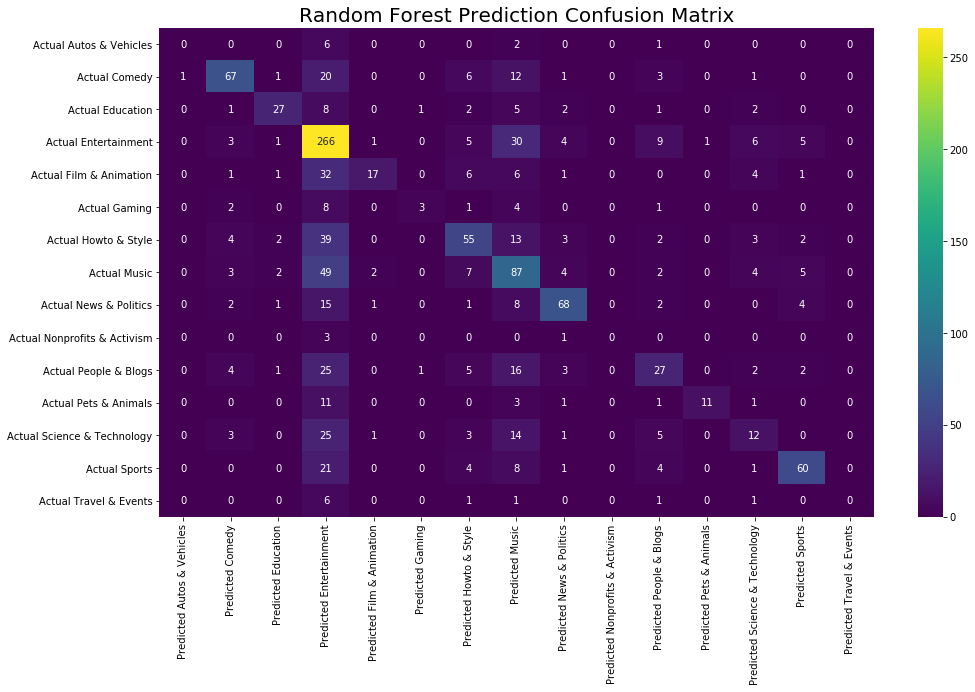

In [47]:
#make a confusion matrix function 
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    plt.figure(figsize=(16,9))
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_test, y_pred)
plt.title('Random Forest Prediction Confusion Matrix', fontsize=20);